# Principles of Data Analytics - Dataset Analysis

## Task 1: Source the Data Set

Sourcing the data for use during the module.

The Iris dataset can be found here: https://gist.github.com/curran/a08a1080b88344b0c8a7

A way to make it easier for the csv to be read easier is found here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [1]:
# Data frames.
import pandas as pd

# Machine Learning Library that contains example datasets.
import sklearn as skl

# Import other libraries that will help with visualising and analysing data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Now that the data frames and machine learning libraries have been imported. It's now time to import the dataset using read.csv. This will be task 2.

In [2]:
# This will load in the iris dataset from the web link.

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

## Task 2: Explore the Data Structure

Need to check that the dataset is actually loaded in.

In [3]:
# Looking at the dataset.

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next, need to check the shape of the data, this will help further along when deciding the types of exploratory statistical tests to conduct.

In [4]:
df.shape

(150, 5)

The dataset contains 150 samples, each of these samples has had a number of measurements taken (5 variables in all) - sepal width and length, petal width and length, and species of iris. Based on Stevens (1946) categarisation of data types, these are forms of ratio (length and width measurements), and nominal (species). 

In [5]:
list(df.columns)
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In order to ease analysis it may be plausible to standardise the dataset, particularly the measurements. This may aid in analysis further down the line. Could do a tukeys analysis later to see if there is significant diference in petal/sepal length and/or width, between the species depending on iris species.

The first and last 5 rows of the dataset are as follows.

In [6]:
sliced_df = pd.concat([df.head(5), df.tail(5)])
print(sliced_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Getting some information on what is included in the dataset. Although I have previously stated that the data is ratio and nominal. This will clarify the data types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the information table, it can be seen that one column has categorical (nominal) data (species column) and all the other columns are of the numeric type with non-Null entriesm that is, there are no 0 / null~ entries in the dataset.

After checking for null values and the different data types, now checking for missing values is important. If there were missing values, the dataset would need to be cleaned and sorted.

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Following a checking of the dataset, it was found that there were no missing values in any of the columns.

To ensure that the data is correct and contains no repitition of recorded values it was important to check for duplicates.

In [9]:
data = df.drop_duplicates(subset ="species",)

print(data.species)

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


No duplicates were found in the dataset.

Next, it was important to check if the dataset was balanced to ensure that the analysis isn't skewed by the data distribution.

In [10]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

It can be seen that all the species contain equal amounts of rows, thus the dataset is balanced.

## Task 3: Summarize the Data

next - quick statistical summary of the dataset

In [11]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Also need to check the class distribution to make sure that nothing will be skewed during the analysis.

In [12]:
print("\nClass distribution:")
print(df['species'].value_counts())


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Looking at the species and the number of samples recorded for each. It can be seen that there were 50 samples recorded for each of the three species; setosa, versicolor, and virginica

## Task 4: Visualize Features

Using a number of different plotting methods the data can be visualised. Due to the nature of the measurements taken for the data, it may be suitable to split the dataset for some plots into those looking at species vs. sepal or petal width/length, and using a boxplot to measure the length vs. width of sepal or petal.

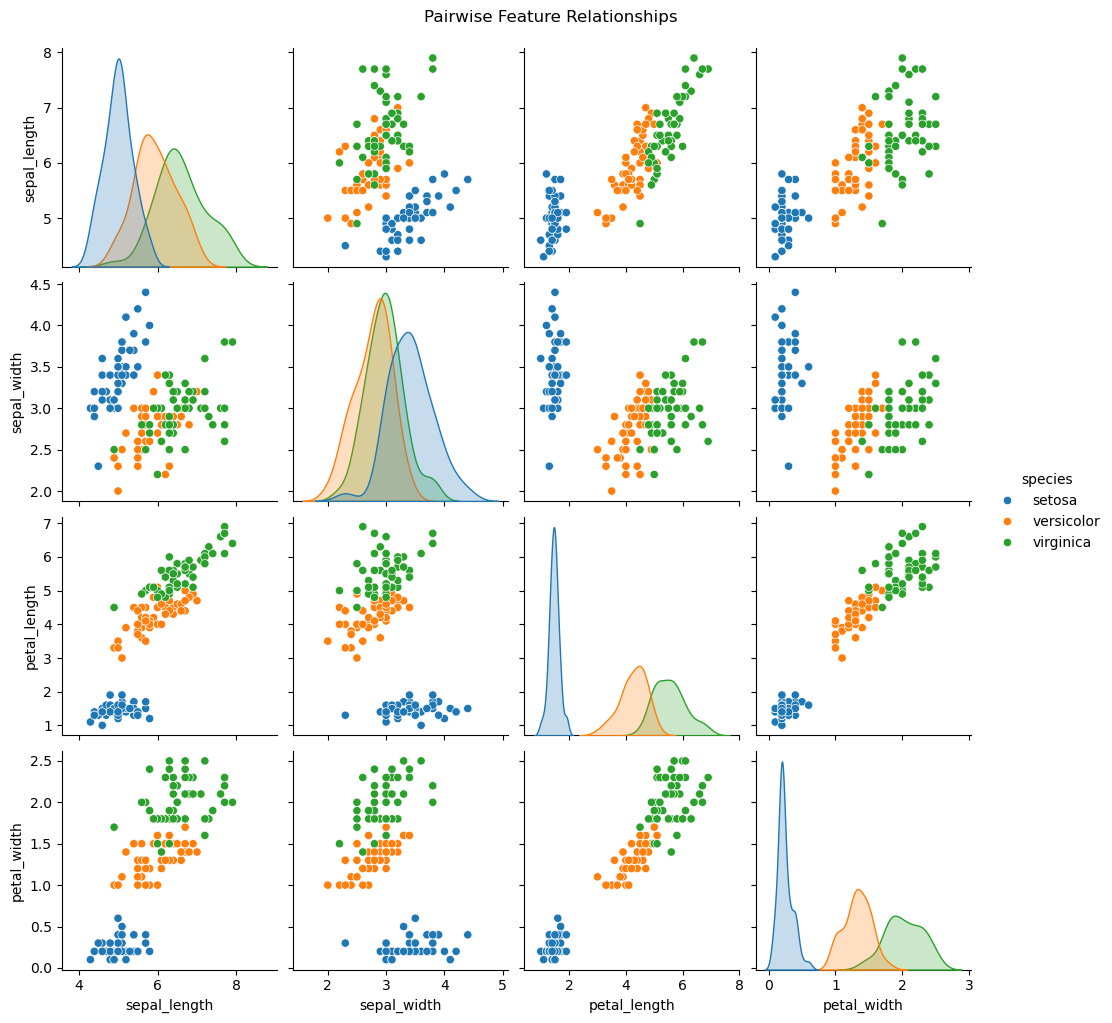

In [13]:
## Visualization
# Pairplot colored by species
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

Observations on plots

Next need to boxplot and seperate by species.

and add error bars to the plots

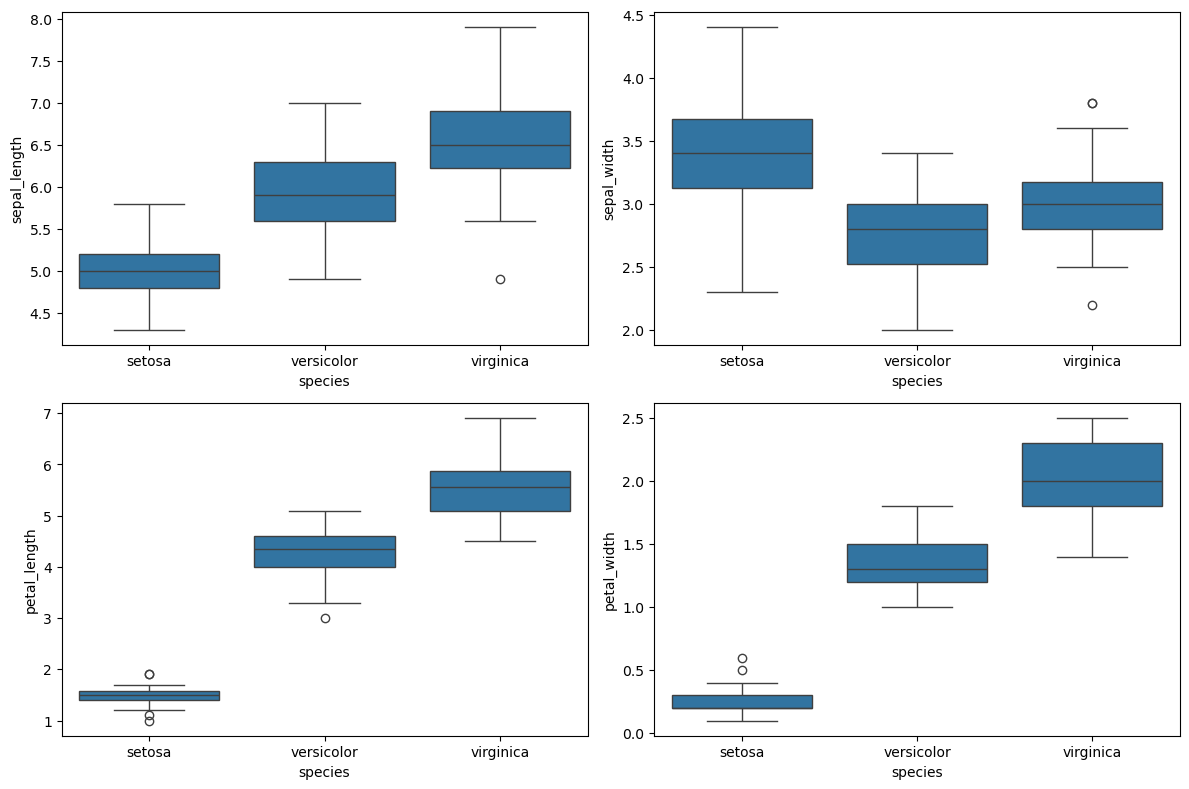

In [17]:
# Boxplots by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
plt.tight_layout()
plt.show()

## Task 5: Investigate Relationships

## Task 6: Analyze Relationship

## Task 7: Analyze Class Distributions

## Task 8: Compute Correlations

## Task 9: Fit a Simple Linear Regression

## Task 10: Too Many Features

## References

Stevens, S. S. 1946. On the Theory of Scales of Measurement. Science, Vol. 103, No. 2648. http://expsylab.psych.uoa.gr/fileadmin/expsylab.psych.uoa.gr/uploads/papers/Stevens_1946.pdf

Python. 2025. Built-in types. https://docs.python.org/3/library/stdtypes.html

Stackoverflow user "Life is complex". First and last n rows of a dataframe. https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe

# HELP DOCS

https://www.geeksforgeeks.org/iris-dataset/

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe

https://bytemedirk.medium.com/mastering-iris-dataset-analysis-with-python-9e040a088ef4

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

https://medium.com/@kachiann/a-beginners-guide-to-machine-learning-with-python-iris-flower-prediction-61814e095268

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/